In [3]:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath, training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return np.array(images), np.array(labels)
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train), (x_test, y_test)

    def select_prototypes(self, x_train, y_train, n_prototypes_per_class=10):
        # make sure y_train is a numpy array
        y_train = np.array(y_train)
        
        prototypes = []
        prototype_labels = []
        for label in np.unique(y_train):
            # select data of current class
            x_class = x_train[y_train == label]
            
            # use K-means to select cluster centers as prototypes
            kmeans = KMeans(n_clusters=n_prototypes_per_class, random_state=42)
            # find 10 prototypes for each class 
            kmeans.fit(x_class.reshape(len(x_class), -1))  # flatten the image
            prototypes.append(kmeans.cluster_centers_)

            # find 10 clusters for each class 
            prototype_labels.extend([label] * n_prototypes_per_class)
        
        return np.vstack(prototypes), np.array(prototype_labels)

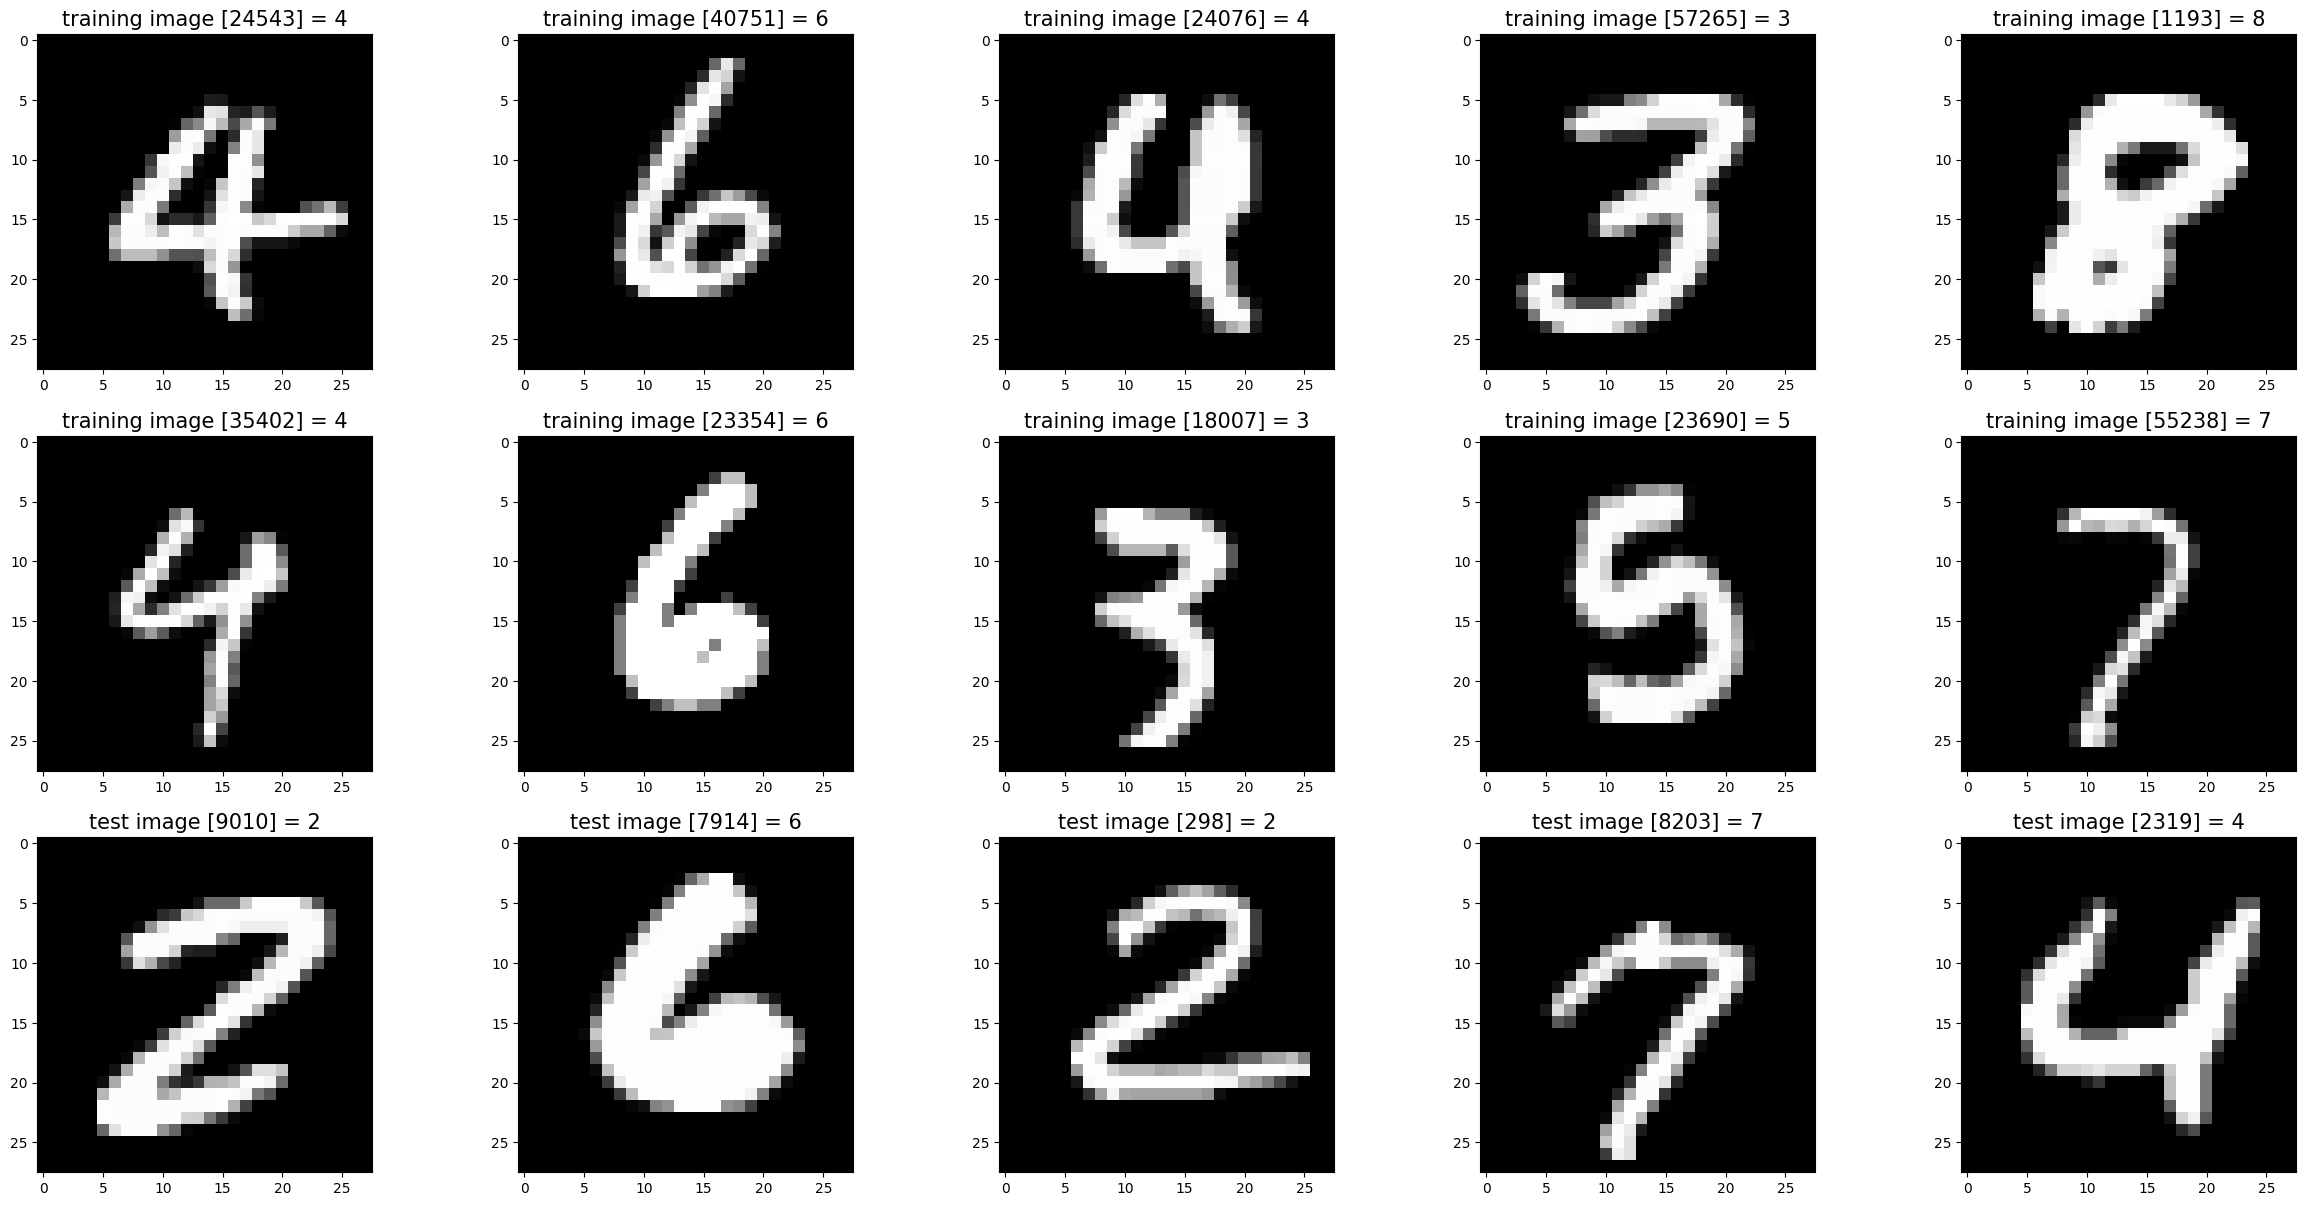

In [4]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = '/root/code/251A_hw/data'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:

print(x_train[0])



[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [6]:
#1-nn without prototypes
import time
start_time = time.time()
knn_full = KNeighborsClassifier(n_neighbors=1)
knn_full.fit(x_train.reshape(len(x_train), -1), y_train)
y_pred_full = knn_full.predict(x_test.reshape(len(x_test), -1))
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Test accuracy with full training set: {accuracy_full:.4f}")
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

Test accuracy with full training set: 0.9691
Time taken: 13.46 seconds


In [7]:
#1. kmeans
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

start_time = time.time()
# select prototypes
x_prototypes, y_prototypes = mnist_dataloader.select_prototypes(x_train, y_train)

# use 1-nn classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_prototypes, y_prototypes)

# evaluate on test set
y_pred = knn.predict(x_test.reshape(len(x_test), -1))
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with prototypes: {accuracy:.4f}")
end_time = time.time()
print(f"Time taken: {end_time - start_time:.2f} seconds")

Test accuracy with prototypes: 0.9223
Time taken: 2.65 seconds


  0%|          | 0/3 [00:00<?, ?it/s]

Evaluating kmeans with 10000 prototypes


Evaluating random with 10000 prototypes


 33%|███▎      | 1/3 [03:00<06:00, 180.34s/it]

Evaluating kmeans with 5000 prototypes


Evaluating random with 5000 prototypes


 67%|██████▋   | 2/3 [04:44<02:15, 135.50s/it]

Evaluating kmeans with 1000 prototypes


Evaluating random with 1000 prototypes


100%|██████████| 3/3 [05:21<00:00, 107.14s/it]


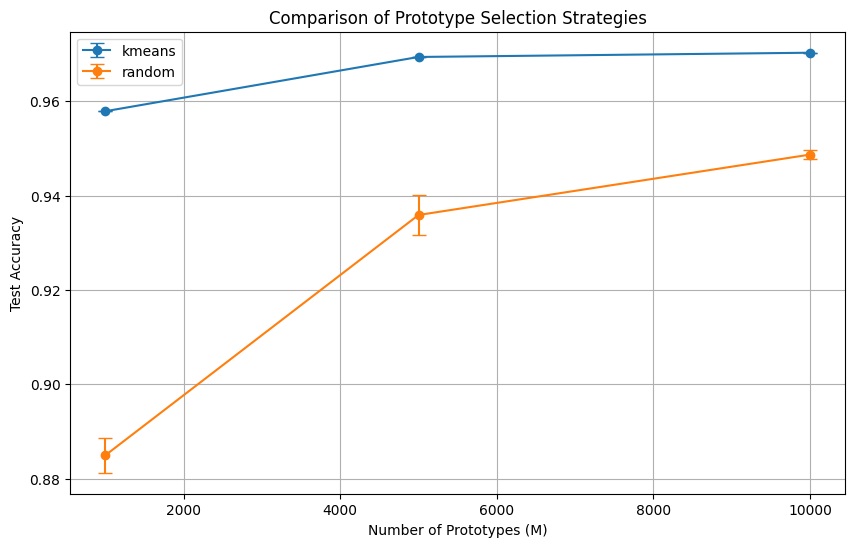

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tqdm

# assume MnistDataloader class is defined and data is loaded
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

def evaluate_knn(x_train, y_train, x_test, y_test, n_prototypes, strategy='kmeans', n_experiments=3):
    accuracies = []
    for _ in range(n_experiments):
        if strategy == 'kmeans':
            x_prototypes, y_prototypes = mnist_dataloader.select_prototypes(x_train, y_train, n_prototypes // len(np.unique(y_train)))
        elif strategy == 'random':
            x_prototypes, y_prototypes = select_prototypes_random(x_train, y_train, n_prototypes)
        
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_prototypes.reshape(len(x_prototypes), -1), y_prototypes)
        y_pred = knn.predict(x_test.reshape(len(x_test), -1))
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    std_error = np.std(accuracies) / np.sqrt(n_experiments)
    return mean_accuracy, std_error

def select_prototypes_random(x_train, y_train, n_prototypes):
    indices = np.random.choice(len(x_train), n_prototypes, replace=False)
    return x_train[indices], y_train[indices]

# M
M_values = [10000, 5000, 1000]
strategies = ['kmeans', 'random']
results = {strategy: [] for strategy in strategies}

# experiment
for M in tqdm.tqdm(M_values) :
    for strategy in tqdm.tqdm(strategies):
        print(f"Evaluating {strategy} with {M} prototypes")
        mean_accuracy, std_error = evaluate_knn(x_train, y_train, x_test, y_test, M, strategy)
        results[strategy].append((mean_accuracy, std_error))

# plot results
plt.figure(figsize=(10, 6))
for strategy in strategies:
    means, errors = zip(*results[strategy])
    plt.errorbar(M_values, means, yerr=[1.96 * e for e in errors], label=strategy, capsize=5, marker='o')

plt.xlabel('Number of Prototypes (M)')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Prototype Selection Strategies')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def evaluate_knn(x_train, y_train, x_test, y_test, n_prototypes, strategy='kmeans', n_experiments=3):
    accuracies = []
    
    if strategy == 'kmeans':
        x_prototypes, y_prototypes = mnist_dataloader.select_prototypes(
            x_train, y_train, n_prototypes_per_class=n_prototypes // len(np.unique(y_train))
        )
        
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_prototypes.reshape(len(x_prototypes), -1), y_prototypes)
        y_pred = knn.predict(x_test.reshape(len(x_test), -1))
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        
        mean_accuracy = np.mean(accuracies)
        std_error = 0.0  # K-means
    elif strategy == 'random':
        for _ in range(n_experiments):
            x_prototypes, y_prototypes = select_prototypes_random(x_train, y_train, n_prototypes)
            
            knn = KNeighborsClassifier(n_neighbors=1)
            knn.fit(x_prototypes.reshape(len(x_prototypes), -1), y_prototypes)
            y_pred = knn.predict(x_test.reshape(len(x_test), -1))
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
        
        mean_accuracy = np.mean(accuracies)
        std_error = np.std(accuracies) / np.sqrt(n_experiments)
    else:
        raise ValueError("Unsupported strategy. Use 'kmeans' or 'random'.")
    
    return mean_accuracy, std_error

100%|██████████| 3/3 [01:59<00:00, 39.69s/it]


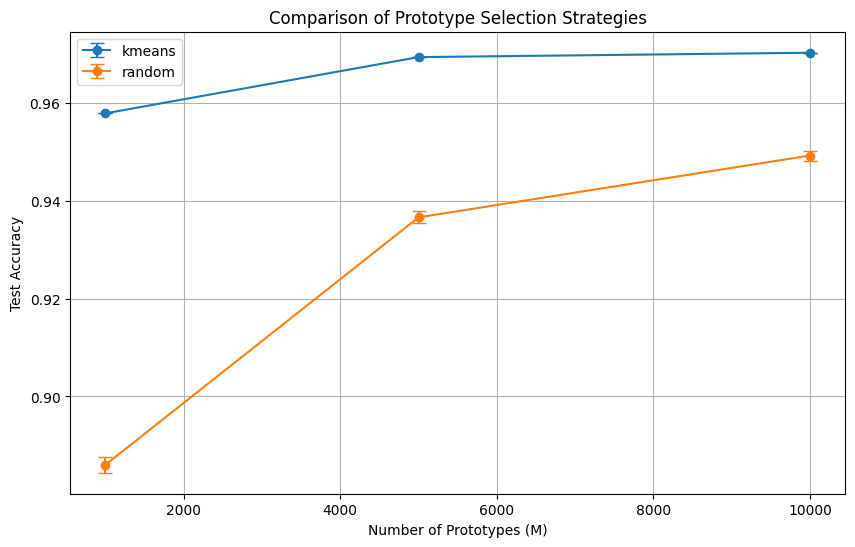

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tqdm
# mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
# (x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

def select_prototypes_random(x_train, y_train, n_prototypes):
    indices = np.random.choice(len(x_train), n_prototypes, replace=False)
    return x_train[indices], y_train[indices]

# M
M_values = [10000, 5000, 1000]
strategies = ['kmeans', 'random']
n_experiments = 10  # 对随机选择进行的实验次数
results = {strategy: [] for strategy in strategies}


for M in tqdm.tqdm(M_values):
    for strategy in tqdm.tqdm(strategies):
        mean_accuracy, std_error = evaluate_knn(
            x_train, y_train, x_test, y_test, M, strategy=strategy, n_experiments=n_experiments
        )
        results[strategy].append((mean_accuracy, std_error))


plt.figure(figsize=(10, 6))
for strategy in strategies:
    means, errors = zip(*results[strategy])
    if strategy == 'kmeans':
        plt.errorbar(M_values, means, yerr=errors, label=strategy, capsize=5, marker='o')
    else:
        plt.errorbar(M_values, means, yerr=[1.96 * e for e in errors], label=strategy, capsize=5, marker='o')  # 95%

plt.xlabel('Number of Prototypes (M)')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Prototype Selection Strategies')
plt.legend()
plt.grid(True)
plt.show()